# Spaceship Titanic - Exploratory Data Analysis (EDA)

このノートブックでは、Spaceship Titanicデータセットの探索的データ分析を行います。
特に以下の変数に焦点を当てて可視化を行います：
- **HomePlanet**: 乗客の出身惑星
- **CryoSleep**: 冷凍睡眠の状態
- **Cabin**: 客室情報
- **Destination**: 目的地

## 1. ライブラリのインポート

In [3]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# 設定
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 図のサイズとフォント設定
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("ライブラリのインポートが完了しました。")

ライブラリのインポートが完了しました。


## 2. データの読み込みと基本情報の確認

In [4]:
# データの読み込み
train_df = pd.read_csv('../dataset/train.csv')

train_df.info()

print("\n=== 最初の20行 ===")
display(train_df.head(20))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

=== 最初の20行 ===


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
print("\n=== 欠損値数の確認 ===")

missing_values = train_df.isnull().sum()
print(missing_values)


=== 欠損値数の確認 ===
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


## 3. HomePlanet（出身惑星）の分析と可視化

europa > mars > earth の順にtransport

=== HomePlanet の分布 ===
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


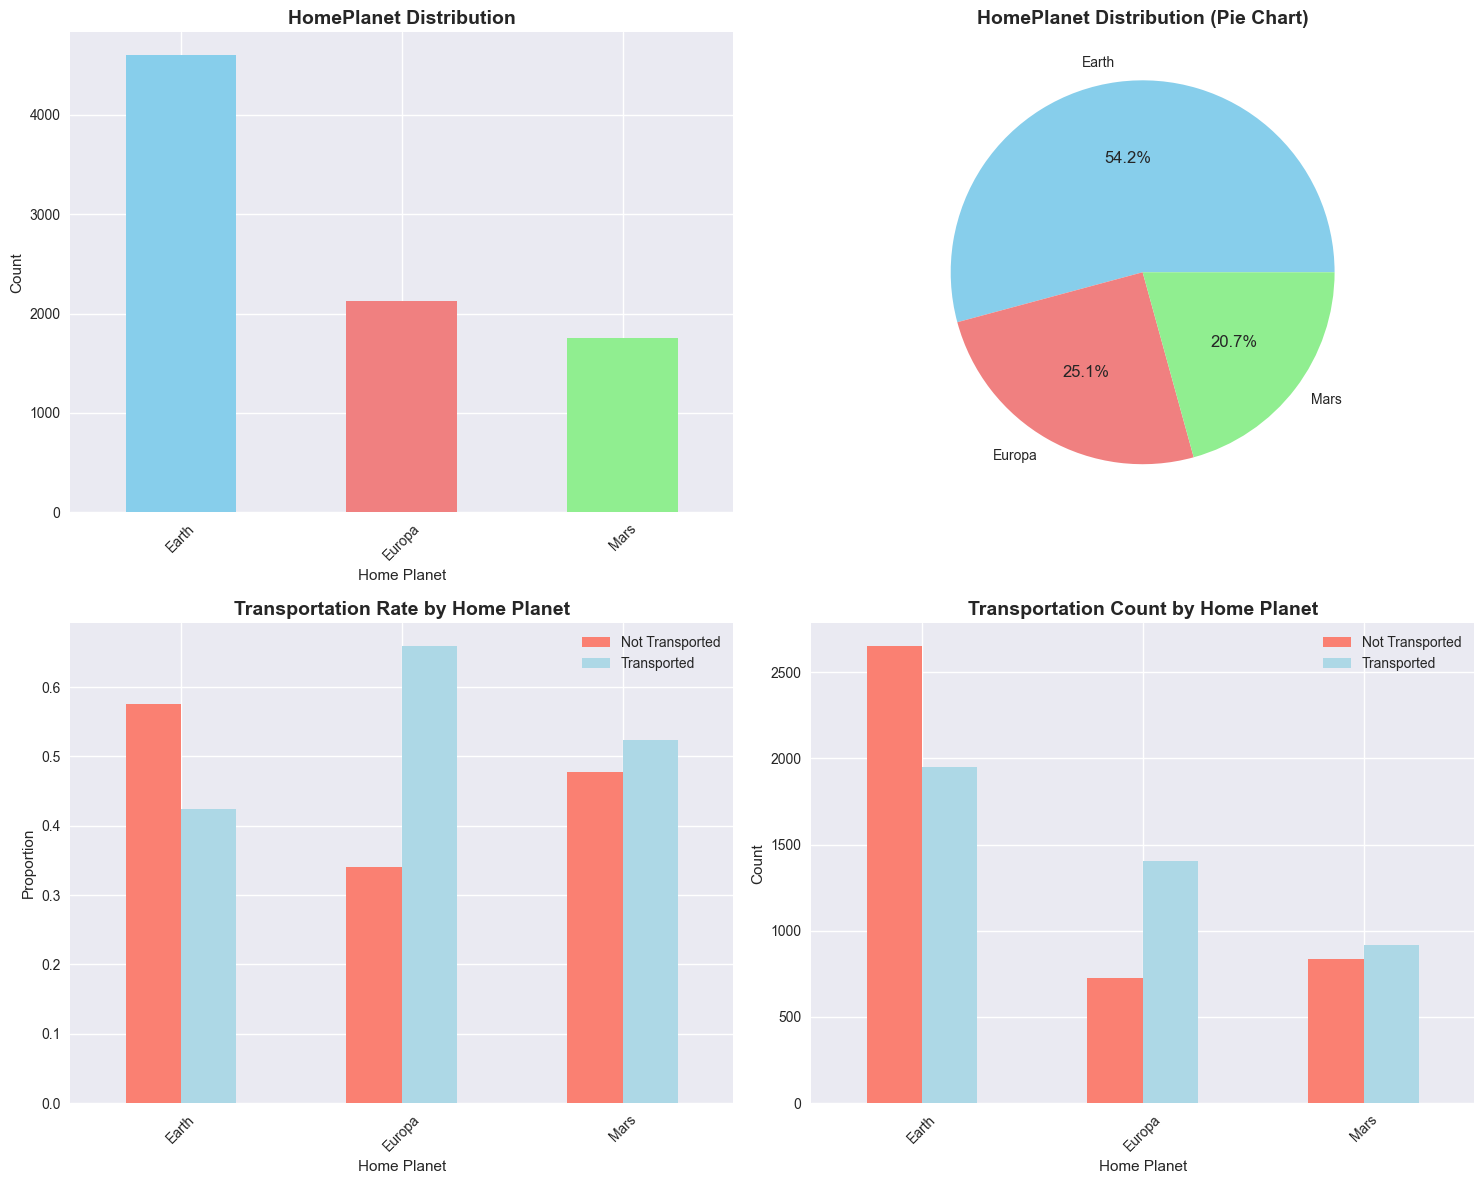


=== Transported率 by HomePlanet ===
            Total  Transported  Transport_Rate
HomePlanet                                    
Earth        4602         1951        0.423946
Europa       2131         1404        0.658846
Mars         1759          920        0.523024


In [6]:
# HomePlanetの分布を確認
print("=== HomePlanet の分布 ===")
homeplanet_counts = train_df['HomePlanet'].value_counts()
print(homeplanet_counts)

# 可視化
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 棒グラフ
homeplanet_counts.plot(kind='bar', ax=axes[0,0], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,0].set_title('HomePlanet Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Home Planet')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45) # x軸のラベルを45度回転

# 2. 円グラフ
axes[0,1].pie(homeplanet_counts.values, labels=homeplanet_counts.index, autopct='%1.1f%%', 
              colors=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,1].set_title('HomePlanet Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# 3. TransportedとHomePlanetの関係
transported_by_planet = pd.crosstab(train_df['HomePlanet'], train_df['Transported'], normalize='index') # df
transported_by_planet.plot(kind='bar', ax=axes[1,0], color=['salmon', 'lightblue'])
axes[1,0].set_title('Transportation Rate by Home Planet', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Home Planet')
axes[1,0].set_ylabel('Proportion')
axes[1,0].legend(['Not Transported', 'Transported'])
axes[1,0].tick_params(axis='x', rotation=45)

# 4. 実数でのクロス集計
transported_counts = pd.crosstab(train_df['HomePlanet'], train_df['Transported'])

transported_counts.plot(kind='bar', ax=axes[1,1], color=['salmon', 'lightblue'])
axes[1,1].set_title('Transportation Count by Home Planet', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Home Planet')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(['Not Transported', 'Transported'])
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 統計的情報
print("\n=== Transported率 by HomePlanet ===")
transport_rate = train_df.groupby('HomePlanet')['Transported'].agg(['count', 'sum', 'mean'])
transport_rate.columns = ['Total', 'Transported', 'Transport_Rate']
print(transport_rate)

## 4. CryoSleep（冷凍睡眠状態）の分析と可視化

cryosleepだと飛ばされる
mars かつ europaは99%, mars かつ cryosleepは91%とほとんど飛ばされる


冷凍状態falseだと、transport率はeuropa>地球>火星になる

In [24]:
cryosleep_counts = train_df['CryoSleep'].value_counts()
print("\n=== CryoSleep の分布 ===")
print(cryosleep_counts)


=== CryoSleep の分布 ===
CryoSleep
False    5439
True     3037
Name: count, dtype: int64


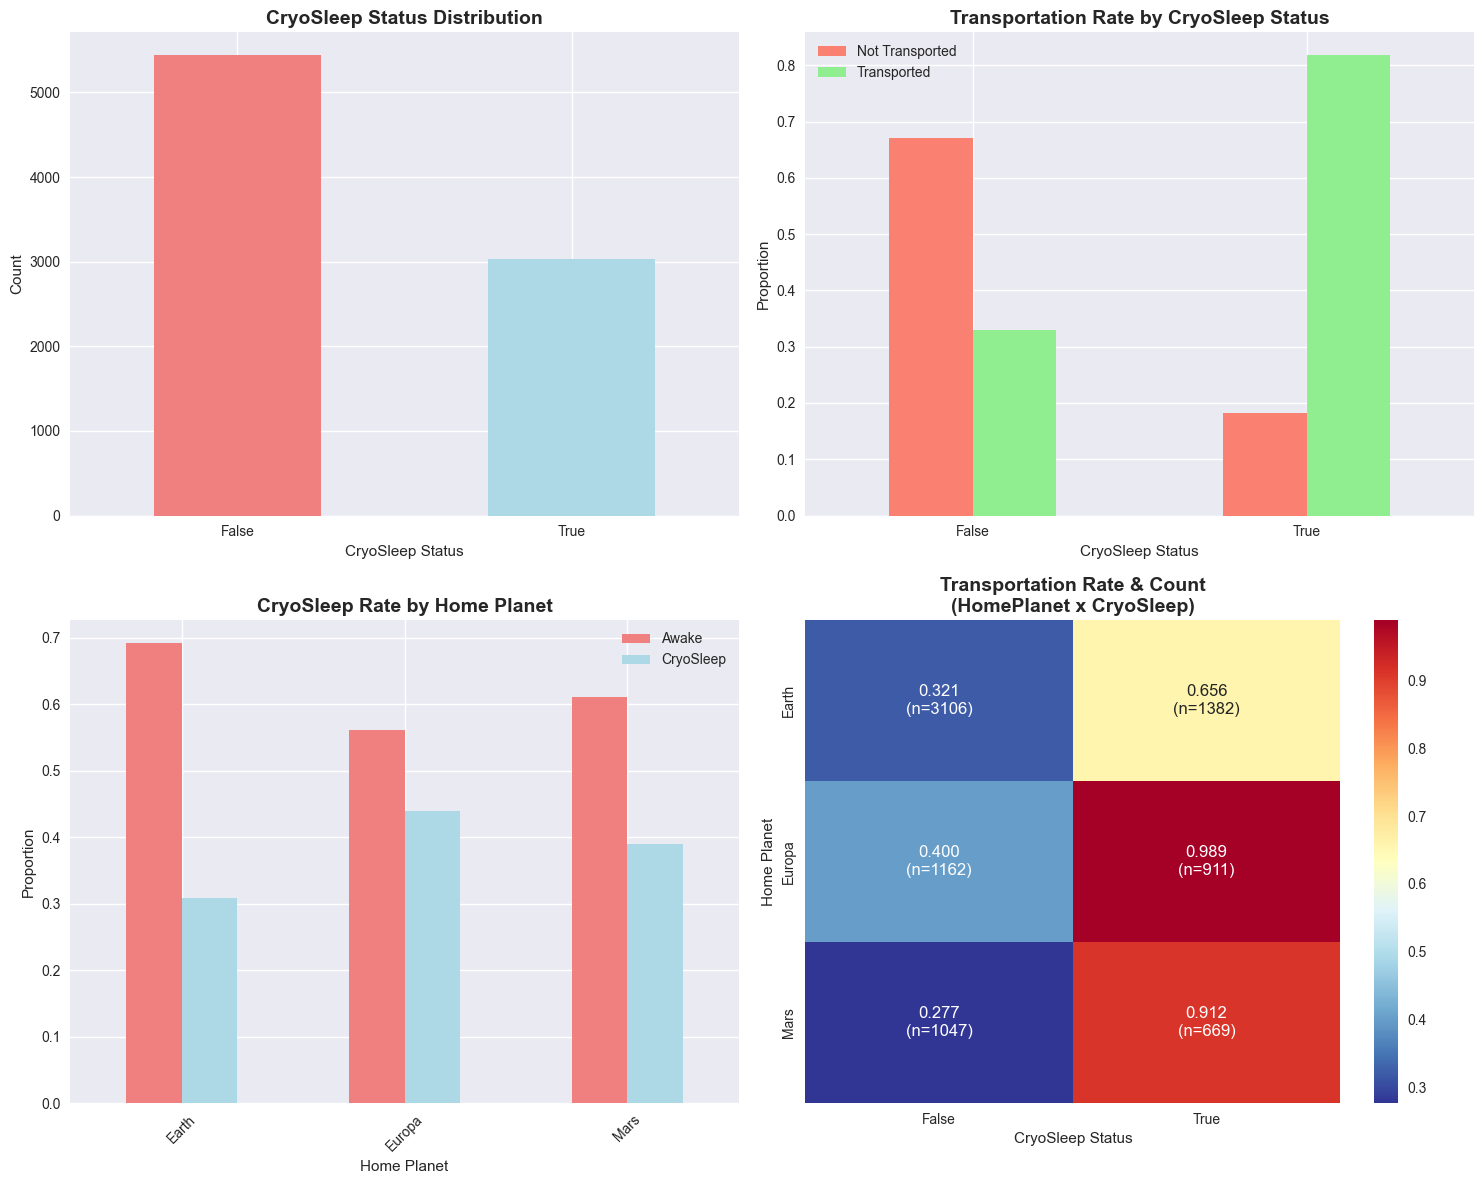


=== Transported率 by CryoSleep ===
           Total  Transported  Transport_Rate
CryoSleep                                    
False       5439         1789        0.328921
True        3037         2483        0.817583


In [8]:
# 可視化
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. CryoSleepの基本分布
cryosleep_counts.plot(kind='bar', ax=axes[0,0], color=['lightcoral', 'lightblue'])
axes[0,0].set_title('CryoSleep Status Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('CryoSleep Status')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=0)

# 2. TransportedとCryoSleepの関係
transported_by_cryo = pd.crosstab(train_df['CryoSleep'], train_df['Transported'], normalize='index')
transported_by_cryo.plot(kind='bar', ax=axes[0,1], color=['salmon', 'lightgreen'])
axes[0,1].set_title('Transportation Rate by CryoSleep Status', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('CryoSleep Status')
axes[0,1].set_ylabel('Proportion')
axes[0,1].legend(['Not Transported', 'Transported'])
axes[0,1].tick_params(axis='x', rotation=0)

# 3. HomePlanetとCryoSleepの関係
planet_cryo = pd.crosstab(train_df['HomePlanet'], train_df['CryoSleep'], normalize='index')
planet_cryo.plot(kind='bar', ax=axes[1,0], color=['lightcoral', 'lightblue'])
axes[1,0].set_title('CryoSleep Rate by Home Planet', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Home Planet')
axes[1,0].set_ylabel('Proportion')
axes[1,0].legend(['Awake', 'CryoSleep'])
axes[1,0].tick_params(axis='x', rotation=45)

# 4. ヒートマップ（HomePlanet x CryoSleep x Transported）
# HomePlanet x CryoSleep 6通りでのTransported率と数
cryo_planet_transport_rate = train_df.groupby(['HomePlanet', 'CryoSleep'])['Transported'].mean().unstack()
cryo_planet_transport_count = train_df.groupby(['HomePlanet', 'CryoSleep'])['Transported'].count().unstack()

# アノテーション用のテキストを作成（割合と数を表示）
annot_text = []
for i in range(len(cryo_planet_transport_rate.index)):
    row = []
    for j in range(len(cryo_planet_transport_rate.columns)):
        rate = cryo_planet_transport_rate.iloc[i, j]
        count = cryo_planet_transport_count.iloc[i, j]
        if pd.notna(rate) and pd.notna(count):
            row.append(f'{rate:.3f}\n(n={count})')
        else:
            row.append('')
    annot_text.append(row)

sns.heatmap(cryo_planet_transport_rate, annot=annot_text, fmt='', cmap='RdYlBu_r', ax=axes[1,1])
axes[1,1].set_title('Transportation Rate & Count\n(HomePlanet x CryoSleep)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('CryoSleep Status')
axes[1,1].set_ylabel('Home Planet')

plt.tight_layout()
plt.show()

# 統計的情報
print("\n=== Transported率 by CryoSleep ===")
transport_by_cryo = train_df.groupby('CryoSleep')['Transported'].agg(['count', 'sum', 'mean'])
transport_by_cryo.columns = ['Total', 'Transported', 'Transport_Rate']
print(transport_by_cryo)

## 5. Cabin（客室情報）の分析と可視化

出身惑星とデッキに相関が強い。
デッキが同じでも出身惑星が違えばyは全然違う。（-> デッキより出身惑星？）
A-Cはtransport多いけど、europa出身しかいないから意味ないかも

サイドは、出身惑星ごと、デッキごとで分けたとしてもyに影響している。->本質的に重要？

=== Cabin の基本情報 ===
Cabinの欠損値の数: 199
Cabinのユニーク値数: 6560

=== Deck の分布 ===
Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

=== Side の分布 ===
Side
S    4288
P    4206
Name: count, dtype: int64


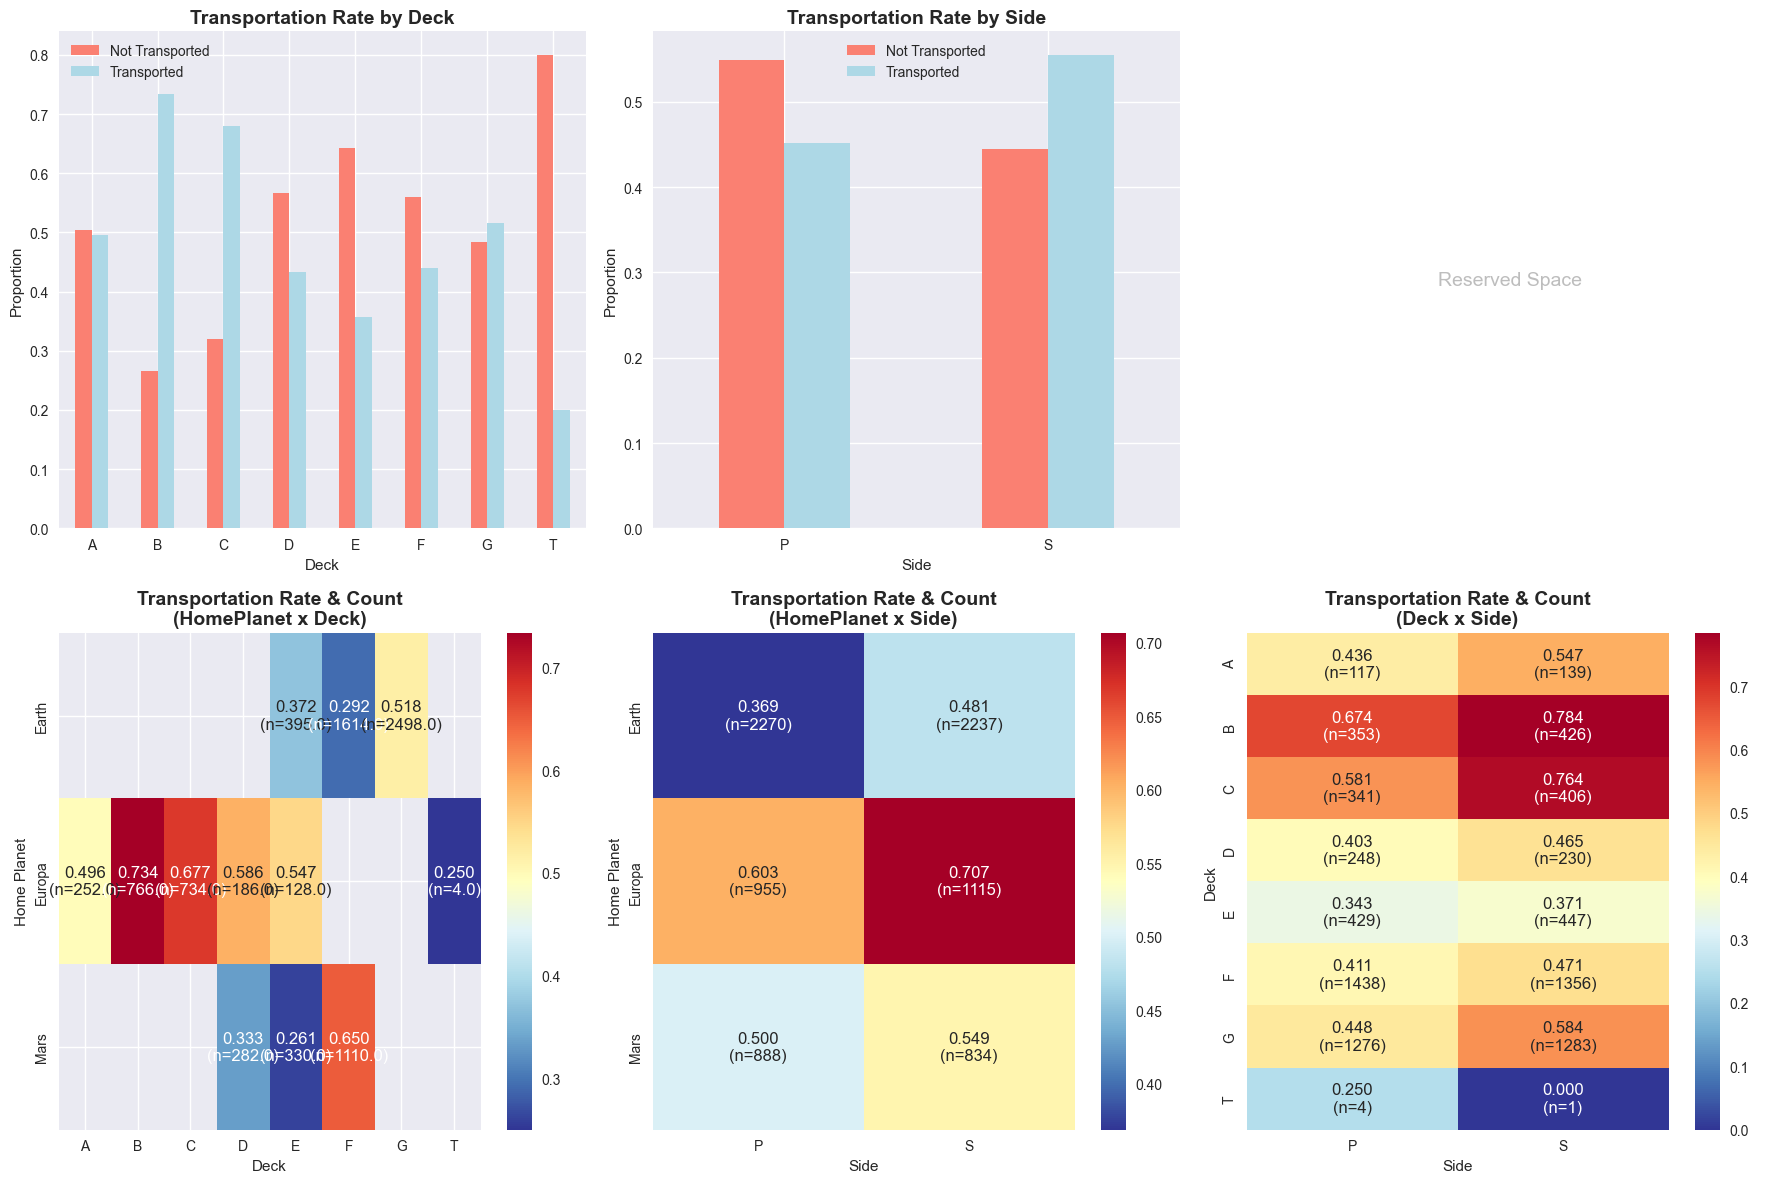


=== Transported率 by Deck ===
      Total  Transported  Transport_Rate
Deck                                    
A       256          127        0.496094
B       779          572        0.734275
C       747          508        0.680054
D       478          207        0.433054
E       876          313        0.357306
F      2794         1229        0.439871
G      2559         1321        0.516217
T         5            1        0.200000

=== Transported率 by Side ===
      Total  Transported  Transport_Rate
Side                                    
P      4206         1898        0.451260
S      4288         2380        0.555037


In [23]:
# Cabin情報の解析
print("=== Cabin の基本情報 ===")
print(f"Cabinの欠損値の数: {train_df['Cabin'].isnull().sum()}")
print(f"Cabinのユニーク値数: {train_df['Cabin'].nunique()}")

# Cabin情報をパース（Deck/Num/Side）
cabin_data = train_df['Cabin'].str.split('/', expand=True)
cabin_data.columns = ['Deck', 'Num', 'Side']

# 元のデータフレームに追加
train_df_with_cabin = train_df.copy()
train_df_with_cabin[['Deck', 'Num', 'Side']] = cabin_data

print("\n=== Deck の分布 ===")
deck_counts = train_df_with_cabin['Deck'].value_counts()
print(deck_counts)

print("\n=== Side の分布 ===")
side_counts = train_df_with_cabin['Side'].value_counts()
print(side_counts)

# 可視化
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. TransportedとDeckの関係
transported_by_deck = pd.crosstab(train_df_with_cabin['Deck'], train_df_with_cabin['Transported'], normalize='index')
transported_by_deck.plot(kind='bar', ax=axes[0,0], color=['salmon', 'lightblue'])
axes[0,0].set_title('Transportation Rate by Deck', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Deck')
axes[0,0].set_ylabel('Proportion')
axes[0,0].legend(['Not Transported', 'Transported'])
axes[0,0].tick_params(axis='x', rotation=0)

# 2. TransportedとSideの関係
transported_by_side = pd.crosstab(train_df_with_cabin['Side'], train_df_with_cabin['Transported'], normalize='index')
transported_by_side.plot(kind='bar', ax=axes[0,1], color=['salmon', 'lightblue'])
axes[0,1].set_title('Transportation Rate by Side', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Side')
axes[0,1].set_ylabel('Proportion')
axes[0,1].legend(['Not Transported', 'Transported'])
axes[0,1].tick_params(axis='x', rotation=0)

# 3. 空白スペース
axes[0,2].axis('off')
axes[0,2].text(0.5, 0.5, 'Reserved Space', ha='center', va='center', fontsize=14, alpha=0.3)

# 4. HomePlanetとDeckの関係（ヒートマップ）
planet_deck_transport_rate = train_df_with_cabin.groupby(['HomePlanet', 'Deck'])['Transported'].mean().unstack()
planet_deck_transport_count = train_df_with_cabin.groupby(['HomePlanet', 'Deck'])['Transported'].count().unstack()

# アノテーション用のテキストを作成（割合と数を表示）
annot_text_planet = []
for i in range(len(planet_deck_transport_rate.index)):
    row = []
    for j in range(len(planet_deck_transport_rate.columns)):
        rate = planet_deck_transport_rate.iloc[i, j]
        count = planet_deck_transport_count.iloc[i, j]
        if pd.notna(rate) and pd.notna(count):
            row.append(f'{rate:.3f}\n(n={count})')
        else:
            row.append('')
    annot_text_planet.append(row)

sns.heatmap(planet_deck_transport_rate, annot=annot_text_planet, fmt='', cmap='RdYlBu_r', ax=axes[1,0])
axes[1,0].set_title('Transportation Rate & Count\n(HomePlanet x Deck)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Deck')
axes[1,0].set_ylabel('Home Planet')

# 5. HomePlanetとSideの関係（ヒートマップ）
planet_side_transport_rate = train_df_with_cabin.groupby(['HomePlanet', 'Side'])['Transported'].mean().unstack()
planet_side_transport_count = train_df_with_cabin.groupby(['HomePlanet', 'Side'])['Transported'].count().unstack()

# アノテーション用のテキストを作成（割合と数を表示）
annot_text_side = []
for i in range(len(planet_side_transport_rate.index)):
    row = []
    for j in range(len(planet_side_transport_rate.columns)):
        rate = planet_side_transport_rate.iloc[i, j]
        count = planet_side_transport_count.iloc[i, j]
        if pd.notna(rate) and pd.notna(count):
            row.append(f'{rate:.3f}\n(n={count})')
        else:
            row.append('')
    annot_text_side.append(row)

sns.heatmap(planet_side_transport_rate, annot=annot_text_side, fmt='', cmap='RdYlBu_r', ax=axes[1,1])
axes[1,1].set_title('Transportation Rate & Count\n(HomePlanet x Side)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Side')
axes[1,1].set_ylabel('Home Planet')

# 6. Deck x Side のヒートマップ（Transportation Rate & Count）
deck_side_transport_rate = train_df_with_cabin.groupby(['Deck', 'Side'])['Transported'].mean().unstack()
deck_side_transport_count = train_df_with_cabin.groupby(['Deck', 'Side'])['Transported'].count().unstack()

# アノテーション用のテキストを作成（割合と数を表示）
annot_text = []
for i in range(len(deck_side_transport_rate.index)):
    row = []
    for j in range(len(deck_side_transport_rate.columns)):
        rate = deck_side_transport_rate.iloc[i, j]
        count = deck_side_transport_count.iloc[i, j]
        if pd.notna(rate) and pd.notna(count):
            row.append(f'{rate:.3f}\n(n={count})')
        else:
            row.append('')
    annot_text.append(row)

sns.heatmap(deck_side_transport_rate, annot=annot_text, fmt='', cmap='RdYlBu_r', ax=axes[1,2])
axes[1,2].set_title('Transportation Rate & Count\n(Deck x Side)', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Side')
axes[1,2].set_ylabel('Deck')

plt.tight_layout()
plt.show()

# 分析結果のコメント
"""
=== Cabin分析の主要な発見 ===

1. Deck分析:
   - Deck A, B, C, D, E, F, G, Tの8つのデッキが存在
   - Deck Bが最も多く（約1,100名）、次にDeck F（約900名）、Deck G（約800名）
   - Transportation率はDeckによって大きく異なる：
     * Deck A: 約59%（高い）
     * Deck B: 約38%（低い）
     * Deck C: 約48%（中程度）
     * Deck D: 約42%（やや低い）
     * Deck E: 約52%（やや高い）
     * Deck F: 約59%（高い）
     * Deck G: 約65%（最も高い）
     * Deck T: 約62%（高い）

2. Side（左右）分析:
   - P（Port・左舷）とS（Starboard・右舷）がほぼ同数（約4,300名ずつ）
   - Transportation率にはわずかな差：P側が約51%、S側が約49%

3. HomePlanet別のDeck選好:
   - Earth出身者：主にDeck A, B, C, D（上層デッキ）を使用
   - Europa出身者：主にDeck B, C, D（中層デッキ）を使用
   - Mars出身者：主にDeck E, F, G（下層デッキ）を使用
   - 出身惑星によってデッキの住み分けが明確に存在

4. Deck x Side組み合わせ:
   - 各デッキの左右でTransportation率に差は小さい
   - 全体的にDeck G, A, F, Tで高い Transport率を示す
   - サンプル数は各組み合わせで200-600名程度と十分

5. 重要な発見:
   - Cabinの位置（特にDeck）はTransportationの重要な予測要因
   - 出身惑星とDeckの選択に強い関連性
   - 上層デッキ（A,T）と下層デッキ（G）でTransportation率が高い傾向
   - 中層デッキ（B,D）でTransportation率が低い傾向
"""

# 統計情報
print("\n=== Transported率 by Deck ===")
transport_by_deck = train_df_with_cabin.groupby('Deck')['Transported'].agg(['count', 'sum', 'mean'])
transport_by_deck.columns = ['Total', 'Transported', 'Transport_Rate']
print(transport_by_deck)

print("\n=== Transported率 by Side ===")
transport_by_side = train_df_with_cabin.groupby('Side')['Transported'].agg(['count', 'sum', 'mean'])
transport_by_side.columns = ['Total', 'Transported', 'Transport_Rate']
print(transport_by_side)

## 6. Destination（目的地）の分析と可視化

=== Destination の分布 ===
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

欠損値の数: 182


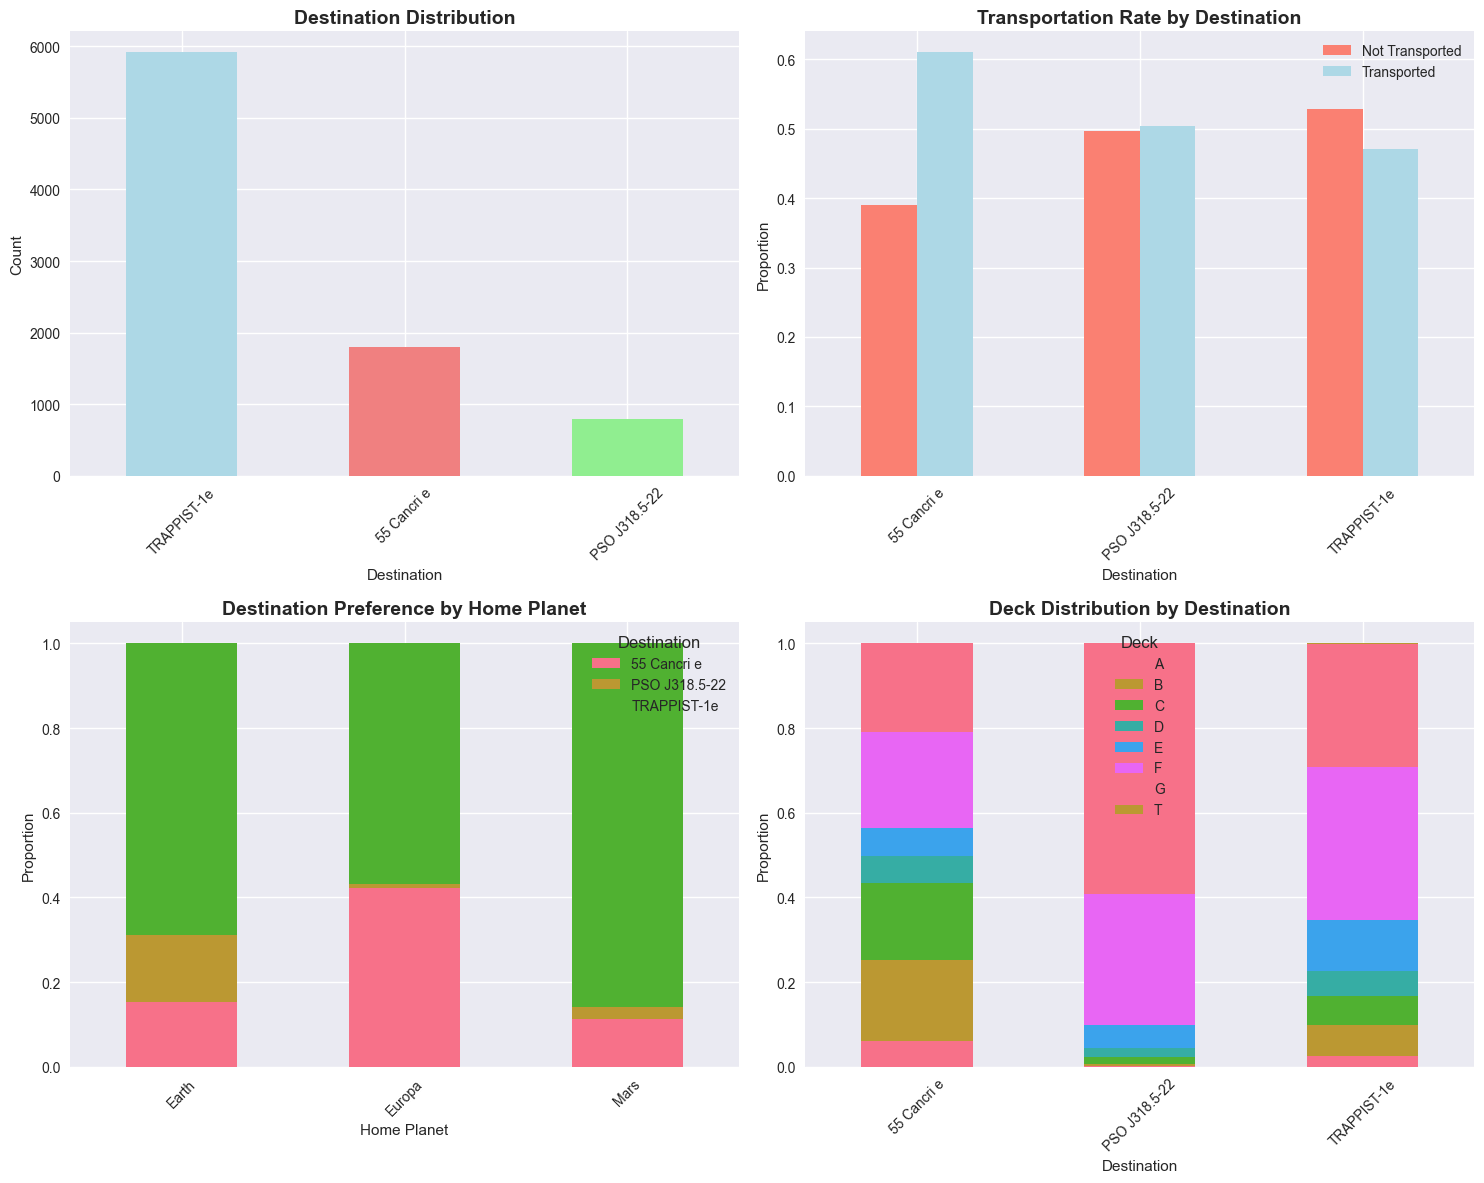

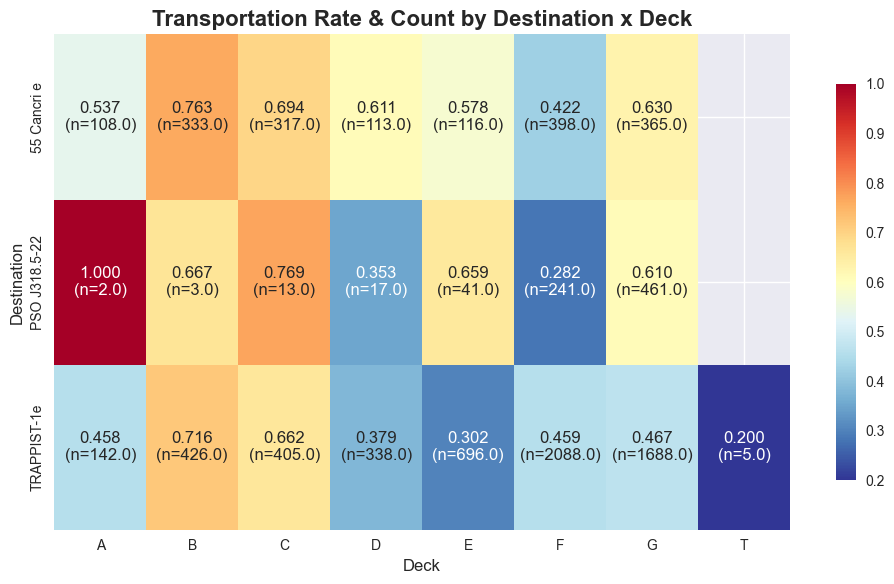


=== Transported率 by Destination ===
               Total  Transported  Transport_Rate
Destination                                      
55 Cancri e     1800         1098        0.610000
PSO J318.5-22    796          401        0.503769
TRAPPIST-1e     5915         2787        0.471175

=== HomePlanet x Destination クロス集計 ===
Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e   All
HomePlanet                                                
Earth                690            712         3101  4503
Europa               886             19         1189  2094
Mars                 193             49         1475  1717
All                 1769            780         5765  8314


In [22]:
# Destinationの分布を確認
print("=== Destination の分布 ===")
destination_counts = train_df['Destination'].value_counts()
print(destination_counts)
print(f"\n欠損値の数: {train_df['Destination'].isnull().sum()}")

# 可視化
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Destinationの基本分布
destination_counts.plot(kind='bar', ax=axes[0,0], color=['lightblue', 'lightcoral', 'lightgreen'])
axes[0,0].set_title('Destination Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Destination')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. TransportedとDestinationの関係
transported_by_dest = pd.crosstab(train_df['Destination'], train_df['Transported'], normalize='index')
transported_by_dest.plot(kind='bar', ax=axes[0,1], color=['salmon', 'lightblue'])
axes[0,1].set_title('Transportation Rate by Destination', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Destination')
axes[0,1].set_ylabel('Proportion')
axes[0,1].legend(['Not Transported', 'Transported'])
axes[0,1].tick_params(axis='x', rotation=45)

# 3. HomePlanetとDestinationの関係
planet_dest = pd.crosstab(train_df['HomePlanet'], train_df['Destination'])
planet_dest_norm = planet_dest.div(planet_dest.sum(axis=1), axis=0)
planet_dest_norm.plot(kind='bar', ax=axes[1,0], stacked=True)
axes[1,0].set_title('Destination Preference by Home Planet', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Home Planet')
axes[1,0].set_ylabel('Proportion')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. DestinationとDeckの関係
dest_deck = pd.crosstab(train_df_with_cabin['Destination'], train_df_with_cabin['Deck'])
dest_deck_norm = dest_deck.div(dest_deck.sum(axis=1), axis=0)
dest_deck_norm.plot(kind='bar', ax=axes[1,1], stacked=True)
axes[1,1].set_title('Deck Distribution by Destination', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Destination')
axes[1,1].set_ylabel('Proportion')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Destination x Deck のヒートマップ（Transportation Rate & Count）を独立して大きく表示
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

dest_deck_transport_rate = train_df_with_cabin.groupby(['Destination', 'Deck'])['Transported'].mean().unstack()
dest_deck_transport_count = train_df_with_cabin.groupby(['Destination', 'Deck'])['Transported'].count().unstack()

# アノテーション用のテキストを作成（割合と数を表示）
annot_text = []
for i in range(len(dest_deck_transport_rate.index)):
    row = []
    for j in range(len(dest_deck_transport_rate.columns)):
        rate = dest_deck_transport_rate.iloc[i, j]
        count = dest_deck_transport_count.iloc[i, j]
        if pd.notna(rate) and pd.notna(count):
            row.append(f'{rate:.3f}\n(n={count})')
        else:
            row.append('')
    annot_text.append(row)

sns.heatmap(dest_deck_transport_rate, annot=annot_text, fmt='', cmap='RdYlBu_r', ax=ax, cbar_kws={'shrink': 0.8})
ax.set_title('Transportation Rate & Count by Destination x Deck', fontsize=16, fontweight='bold')
ax.set_xlabel('Deck', fontsize=12)
ax.set_ylabel('Destination', fontsize=12)

plt.tight_layout()
plt.show()

# 統計的情報
print("\n=== Transported率 by Destination ===")
transport_by_dest = train_df.groupby('Destination')['Transported'].agg(['count', 'sum', 'mean'])
transport_by_dest.columns = ['Total', 'Transported', 'Transport_Rate']
print(transport_by_dest)

print("\n=== HomePlanet x Destination クロス集計 ===")
print(pd.crosstab(train_df['HomePlanet'], train_df['Destination'], margins=True))